# $\color{blue}{\text{TP 1 IIA : Prise en main}}$

## <font color="#1abc9c">Introduction</font>

**Objectifs du TP :**

Du point de vue des *savoirs-faire*, ce premier TP vise à se familiariser avec la manipulation des données en utilisant python et les librairies dédiées. Il s'agit de comprendre les formats de données utilisés, ainsi que les différentes commandes utiles et d'etre capable de les manipuler. Autrement dit, savoir les adapter à n'importe quel jeu de données.

Du point de vue des *connaissances*, ce TP concerne les aspects méthodologiques : nécessité d'un ensemble de test, évaluation d'un classifieur. Il s'agit de comprendre et savoir interpréter les métriques retournées.

L'analyse du jeu de données est également un point crucial dans la mise en oeuvre d'un processus d'apprentissage.

**Présentation des principales librairies utilisées :**

- numpy : outils fondamentaux de calcul scientifique. Définit les matrices multi-dimensionnelles et toutes les opérations de calcul algébrique et statistique associé
- pandas : outil d'analyse et de manipulation de données
- matplotlib : création de graphes
- seaborn : librairie de visualisation de données (utilise pandas et matplotlib)
- scikit-learn : la librairie la plus importante. C'est la librairie d'apprentissage : elle contient tous les algorithmes et outils nécessaires pour faire de l'analyse de données prédictive, que ce soit supervisé ou non, en classification ou en regression (basé sur numpy). Elle est très bien documentée (voir le User Guide et les APIs https://scikit-learn.org/stable/modules/classes.html)

**Représentation des données dans scikit-learn:**

Pour pouvoir utiliser les modèles implémentés dans scikit-learn, les données doivent être représentées dans un format spécifique : il s'agit de matrices (les exemples) ou de vecteurs (les cibles) au format numpy.

<img src='http://people.irisa.fr/Ewa.Kijak/enseignement/iia/scikit_inputs.png' />

Format des objets : numpy.ndarray

<code>
print(type(X))
</code>

<class 'numpy.ndarray'>






## <font color="#1abc9c">1. Chargement et analyse des données</font>

Nous allons utiliser dans ce TP un jeu de données pour une tache de **classification**.

Il existe de nombreuses facons de charger un jeu de données. Certains jeux de données peuvent être chargés directement avec scikit learn :
<code>
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
y = dataset.target
</code>
Dans ce cas, (X, y) sont directement des *numpy array* et donc utilisables par scikit-learn.

Nous utiliserons dans ces TPs la librairie *pandas* qui permet notamment de charger efficacement des fichiers csv. L'objet retourné est de type *pandas dataframe* et devra être converti ultérieurement en *numpy array* pour pouvoir utiliser scikit learn.

In [5]:
import pandas as pd

iris_df=pd.read_csv('./data/Iris.csv', sep=',')

# Affichage des 5 premieres lignes du dataframe
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Pandas propose de nombreuses fonctions pour analyser et décrire les données
print("Résumé des données")
iris_df.info()
print("\n Statistiques")
print(iris_df.describe())
print("\n Nombre de valeurs uniques dans la colonne 'Species' et nombre d'instances prenant chacune de ces valeurs")
print(iris_df.Species.unique())
print(iris_df.groupby('Species')["Id"].count())


Résumé des données
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

 Statistiques
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0

L'analyse du jeu de données est une étape préliminaire indispensable, pour comprendre les données et la tache, et pouvoir ensuite choisir un ou plusieurs modèles de facon pertinente.

<font color="red">**Question 1 :**</font>
- Combien y'a-t-il d'exemples dans le jeu de données ?
- Quelle est la variable cible ? Combien y'a-t-il de classes ? Quelles sont-elles ?
- Combien y'a-t-il d'attributs ? Que représentent-ils ? Lesquels sont pertinents pour une tache de classification ?
- Quelle est la répartition des exemples par classe ?

$\color{blue}{\text{Remarque}}$ : pour cacher la sortie de l'execution, il suffit de double-cliquer à gauche de la sortie. Un nouveau clic fera ré-apparaitre la sortie.

## <font color="#1abc9c">2. Visualisation des données</font>

Lorsque le nombre d'attributs le permet, il est toujours utile de pouvoir visualiser la distribution des données, notamment pour se rendre compte du degré de complexité de la tache de classification ou de regression.

Lorsque le nombre d'attributs est très elevé, il faudra recourir à des outils de visualisation de données en grande dimension, basés sur la réduction de la dimension (ACP, t-SNE,...)

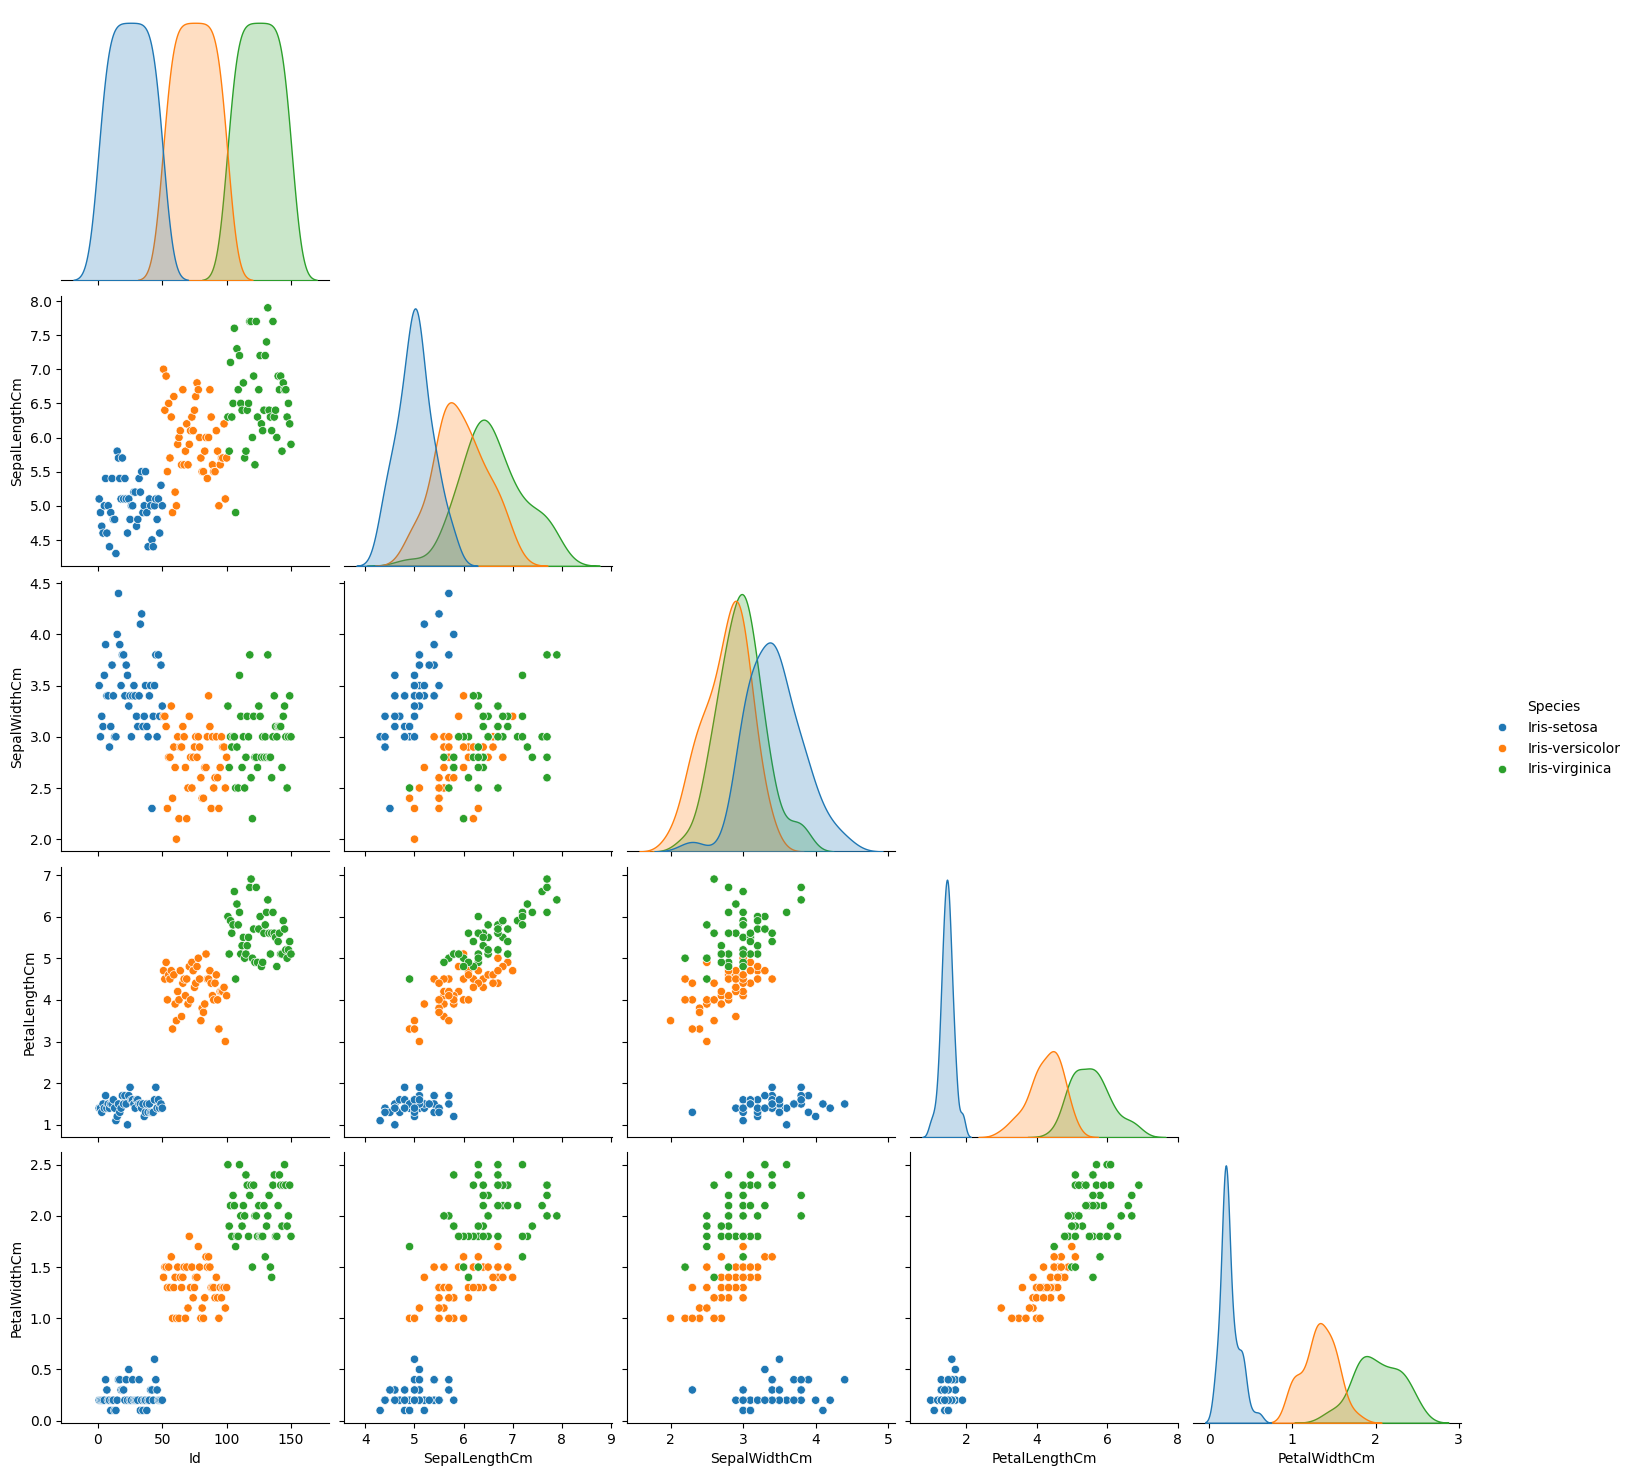

In [3]:
%matplotlib inline
import seaborn as sns

sns.pairplot(iris_df, hue='Species', height=3, corner=True);

<font color="red">**Question 2 :**</font> (Justifiez vos réponses).
- Certaines paires d'attributs vous paraissent-elles mieux séparer les classes que d'autres ? 
- Certaines classes vous paraissent-elles plus faciles à caractériser ?


## <font color="#1abc9c">3. Préparation du jeu de données</font>

**Etape 1 :** Il faut préparer les données pour qu'elles soient utilisables par scikit-learn, ie une matrice X pour les données et un vecteur y pour les labels (cf. intro) de type *numpy array*


In [2]:
dataset=iris_df.to_numpy() #convert the DataFrame to a NumPy array.
X=dataset[:,1:5] # return cols from start_index to end_index – 1 and will include all rows
y=dataset[:,5]

# Verification des donnees produites
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


**Etape 2 :** Séparation du jeu de données en ensemble d'apprentissage et test.

Une approche naive consiste à prendre par exemple les premiers 2/3 des exemples pour l'apprentissage et les 1/3 restants pour le test. 



In [6]:
import numpy as np

test_proportion = 1./3 # (holding out 33% of the data for testing)
testset_size= (int)(test_proportion*len(X))
trainset_size= (int)((1-test_proportion)*len(X))
X_train = X[0:trainset_size]
y_train = y[0:trainset_size]
X_test = X[trainset_size:trainset_size+testset_size]
y_test = y[trainset_size:trainset_size+testset_size]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


print("Stats on train target: \n", np.unique(y_train, return_counts=True))
print("Stats on test target: \n", np.unique(y_test, return_counts=True))

(100, 4)
(100,)
(50, 4)
(50,)
Stats on train target: 
 (array(['Iris-setosa', 'Iris-versicolor'], dtype=object), array([50, 50]))
Stats on test target: 
 (array(['Iris-virginica'], dtype=object), array([50]))


<font color="red">**Question 3a:**</font> Combien y'a-t-il d'exemples dans l'ensemble d'apprentissage ? de test ?

<font color="red">**Question 3b:**</font> Regardez la distribution des classes dans l'ensemble d'apprentissage et de test. Que constatez-vous ? Est-ce pertinent ?

Une facon de procéder est de mélanger aléatoirement les données avant de les séparer (*"shuffling"*):
<code>
X_shuffle, y_shuffle = shuffle(X, y, random_state=0)    
</code> 

On peut également utiliser une fonction de scikit-learn qui fait tout cela.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1./3, random_state = 1)

# Verification du résultat
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

print("Stats on train target: \n", np.unique(y_train, return_counts=True))
print("Stats on test target: \n", np.unique(y_test, return_counts=True))

(100, 4)
(50, 4)
(100,)
(50,)


NameError: name 'np' is not defined

<font color="red">**Question 3c:**</font> Quelle est la distribution des classes dans l'ensemble d'apprentissage et de test ? Est-ce pertinent ?

## <font color="#1abc9c">4. Apprentissage et évaluation d'un classifieur (modèle)</font>

On utilise ici un classifieur (modèle) dont il n'est pas, pour l'instant, nécessaire de comprendre le fonctionnement. Le modèle est stocké dans un objet qu'on choisit d'appeler 'classifier'.



In [8]:
# Apprentissage du modèle sur les données d'entrainement
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 50)
classifier.fit(X_train, y_train);

### 4.1 Accuracy

*classifier* est le modèle appris sur les données d'apprentissage (fonction **fit()**). Il peut maintenant servir à prédire la classe de nouvelles données.

La fonction **predict()** peut prendre en entrée 1 ou plusieurs exemples.


In [9]:
# prediction de la classe pour l'exemple x=[5, 5, 3, 2]
sample = [[5, 5, 3, 2]]
pred = classifier.predict(sample)
print("classe prédite :", pred)

# prediction de la classe pour 2 exemples x(1) et x(2)
samples = [[5.7, 2.8, 3.6, 1.21], [4.8, 3.5, 2.9, 1.86]]
pred = classifier.predict(samples)
print("classes prédites :", pred)



classe prédite : ['Iris-setosa']
classes prédites : ['Iris-versicolor' 'Iris-setosa']


Bien entendu, pour vérifier si la classification est correcte, il faut disposer de la vérité terrain, ce qui est le cas pour l'ensemble de test.

In [10]:
# prediction pour le 2eme exemple de l'ensemble de test
y_pred_sample = classifier.predict([X_test[1,:]])
print(y_pred_sample)
print(y_test[1])

# predictions pour l'ensemble de test
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        print(y_pred[i],y_test[i]) 


['Iris-setosa']
Iris-versicolor
['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor']
['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-se

<font color="red">**Question 4:**</font> comparer (manuellement) les classes prédites avec les classes vraies. Combien de fois le classifieur se trompe-t-il ?

Scikit learn permet de calculer l'accuracy du modèle.

<font color="red">**Question 5:**</font> Que représente cette valeur ? Comment est-elle calculée ?

In [110]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# TODO: calculez l'erreur réelle et l'erreur empirique

y_pred_trained = classifier.predict(X_train)

print("erreur réelle   ",1 - metrics.accuracy_score(y_test, y_pred))
print("erreur empirique",1 - metrics.accuracy_score(y_train, y_pred_trained))

Accuracy: 0.5
erreur réelle    0.5
erreur empirique 0.19999999999999996


<font color="red">**Question 6:**</font> Donnez l'erreur empirique et l'erreur réelle (en ajoutant les lignes de codes nécessaires). Que représentent-elles ? Quelles sont leur utilité ?

### 4.2 Matrice de confusion

La matrice de confusion est un meilleur outil pour analyser les résultats et le comportement d'un classifieur.


In [12]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred) # Attention à l'ordre des arguments qui détermine la signification des lignes et des colonnes de la matrice !
print(conf)

[[17  0  0]
 [ 1 16  2]
 [ 0  1 13]]


<font color="red">**Question 7:**</font> A quoi correspondent les lignes et les colonnes de cette matrice ?


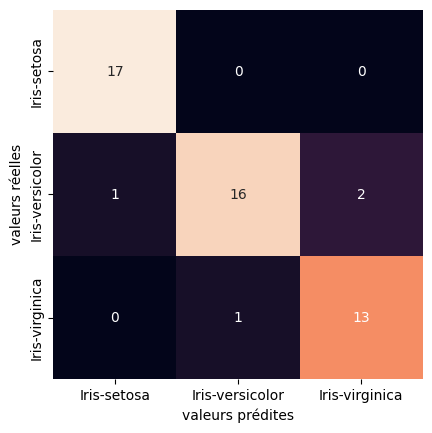

In [13]:
# On peut obtenir une meilleure visualisation de cette matrice
import matplotlib.pyplot as plt
sns.heatmap(conf, square=True, annot=True, cbar=False
       , xticklabels=np.unique(y_test)
       , yticklabels=np.unique(y_test))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

<font color="red">**Question 8:**</font> 
- Retrouvez la valeur de l'accuracy à partir de cette matrice
- Quelle est la precision pour la classe 'Iris-virginica' ?
- Quel est le rappel pour la classe 'Iris-virginica' ?
- Quelle est la classe qui a le meilleur rappel ? Qu'est-ce que cela signifie ?
- Quelle est la classe qui a la plus faible précision ? Qu'est-ce que cela signifie ?

### 4.3 Frontière de decision

La visualisation de la frontière de décision n'est possible qu'en 2D. S'il y a plus d'attributs, cela implique de sélectionner 2 attributs.


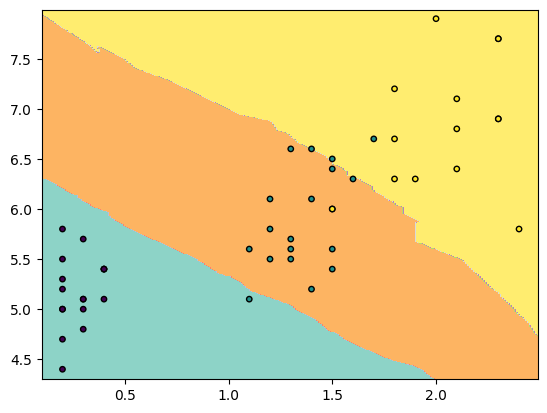

In [57]:
import tpiia_utils
from sklearn import preprocessing

### Convert label to values with scikit-learn - needed for visualisation fonction
enc = preprocessing.LabelEncoder()
yv= enc.fit_transform(y)

Xplot=X[:,[3,0]] # on sélectionne les 2 premiers attributs dans le jeu de données
# autre syntaxe possible : Xplot=X[:,0:2] 

# On doit apprendre un classifieur qui ne prend que les 2 variables selectionnées en entrée
Xplot_train, Xplot_test, yplot_train, yplot_test = train_test_split(Xplot, yv, test_size = 1./3, random_state = 1)
classifier_plot = KNeighborsClassifier(n_neighbors = 50)
classifier_plot.fit(Xplot_train, yplot_train);

# Fonction de visualisation de la frontiere de decision
tpiia_utils.plot_boundary(classifier_plot, Xplot_test, yplot_test)


<font color="red">**Question 9:**</font> Repérez visuellement les exemples mal classés, Combien en comptez-vous ?

<font color="red">**Question 10:**</font> 
- Calculez l'accuracy du nouveau classifieur 'classifieur_plot'.
- Recommencez avec d'autres couples d'attributs. 
- Indiquez les résultats obtenus sous forme de tableau : couples attributs/accuracy. 
- Quel est le couple d'attributs le plus informatif pour la classification ? 
- Cela rejoint-il votre observation de la question 2 ?

In [58]:
# TODO: calculez l'accuracy du nouveau classifieur 'classifieur_plot'

yplot_pred = classifier_plot.predict(Xplot_test)

print("Accuracy", metrics.accuracy_score(yplot_test, yplot_pred))

Accuracy 0.92


### 4.4 Validation croisée

Supposons que l'on apprenne les paramètres du classifieur sur des ensembles d'apprentissage et de test différents.

Cela peut se faire en modifiant la graine du générateur (pseudo-)aléatoire ('random_state') qui va déterminer quels exemples sont tirés lors de la séparation du jeu de données.

**A faire :** Utilisez l'exemple jouet ci-dessous pour bien comprendre l'effet de la variable ('random_state'):
- générer des échantillons d'apprentissage et de test avec 'random_state=1'
- modifier la valeur de 'random_state' : qu'observez-vous ?


In [78]:
# Random_state toy example
# Toy dataset creation
X_toy=range(1,11)
y_toy=[1,1,1,1,1,1,0,0,0,0]
print("small data toy: ",list(X_toy))
# Split with 'random_state = 1'
X_train_toy1, X_test_toy1, y_train_toy1, y_test_toy1 = train_test_split(X_toy, y_toy, test_size = 1./3, random_state = 100)
print("train_set1 :", X_train_toy1)
print("test_set1 :", X_test_toy1)

small data toy:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_set1 : [5, 3, 1, 4, 10, 9]
test_set1 : [8, 7, 2, 6]


In [79]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 1./3, random_state = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 1./3, random_state = 20)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 1./3, random_state = 34)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 1./3, random_state = 45)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size = 1./3, random_state = 103)

classifier.fit(X_train1, y_train1);
y_pred1 = classifier.predict(X_test1)
print("Accuracy on test1:", metrics.accuracy_score(y_test1, y_pred1))

classifier.fit(X_train2, y_train2);
y_pred2 = classifier.predict(X_test2)
print("Accuracy on test2:", metrics.accuracy_score(y_test2, y_pred2))

classifier.fit(X_train3, y_train3);
y_pred3 = classifier.predict(X_test3)
print("Accuracy on test3:", metrics.accuracy_score(y_test3, y_pred3))

classifier.fit(X_train4, y_train4);
y_pred4 = classifier.predict(X_test4)
print("Accuracy on test4:", metrics.accuracy_score(y_test4, y_pred4))

classifier.fit(X_train5, y_train5);
y_pred5 = classifier.predict(X_test5)
print("Accuracy on test5:", metrics.accuracy_score(y_test5, y_pred5))



Accuracy on test1: 0.92
Accuracy on test2: 0.9
Accuracy on test3: 0.88
Accuracy on test4: 0.86
Accuracy on test5: 0.74


<font color="red">**Question 11:**</font> Qu'observez-vous ? Quel problème est illustré en modifiant la graine ? Que peut-on dire de la performance du modèle choisi ?

<font color="red">**Question 12:**</font> Rappelez le principe de la validation croisée à k plis. Que permet cette procédure ?

La validation croisée est implémentée dans scikit-learn. Il y a plusieurs façons de la faire, la plus compacte est donnée ci-dessous.

In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=5)
print(scores)

[0.9        0.93333333 0.86666667 0.93333333 0.93333333]


<font color="red">**Question 13:**</font> Que retourne 'cross_val_score' ? Combien y'a-t-il de plis ici ?

On peut obtenir le score moyen, ainsi que l'écart-type :

In [81]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.03


## <font color="#1abc9c">5. Pré-traitement des données</font>

Pour certains modèles, la transformation des données (on parle de pré-traitement) est indispensable, en particulier lorsque les attributs ont des ordres de grandeurs différents et que le modèle se base sur des calculs de distance entre les exemples (distance dans l'espace des attributs, soit, un espace vectoriel de dimension d). Cela accélère également parfois la convergence d'algorithmes comme la descente de gradient.

Les principaux pré-traitements sont les suivants :

- binarisation
- centrer et réduire
- scaling
- normalization L2

Ils sont illustrés ci-dessous sur un jeu de données jouet.

In [82]:
from sklearn import preprocessing
input_data = np.array(
   [[2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]])

data_binarized = preprocessing.Binarizer(threshold=0.5).transform(input_data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


In [83]:
#displaying the mean and the standard deviation of the input data
print("Mean =", input_data.mean(axis=0)) # axis=0 -> selon les colonnes
print("Stddeviation = ", input_data.std(axis=0))

#Removing the mean and the standard deviation of the input data
data_scaled = preprocessing.scale(input_data)
print("Mean_removed =", data_scaled.mean(axis=0))
print("Stddeviation_removed =", data_scaled.std(axis=0))
print("\nScaled data:\n", data_scaled)

Mean = [ 1.75  -1.275  2.2  ]
Stddeviation =  [2.71431391 4.20022321 4.69414529]
Mean_removed = [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Stddeviation_removed = [1. 1. 1.]

Scaled data:
 [[ 0.12894603 -0.14880162  0.70300338]
 [-1.19735598  0.8749535   0.27694073]
 [-0.46052153 -1.57729713  0.72430651]
 [ 1.52893149  0.85114524 -1.70425062]]


In [84]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print ("\nMin max scaled data:\n", data_scaled_minmax)



Min max scaled data:
 [[0.48648649 0.58252427 0.99122807]
 [0.         1.         0.81578947]
 [0.27027027 0.         1.        ]
 [1.         0.99029126 0.        ]]


In [85]:
data_normalized=preprocessing.Normalizer().fit_transform(input_data)
print ("\nL2 Normalized data:\n", data_normalized)


L2 Normalized data:
 [[ 0.33946114 -0.30713151  0.88906489]
 [-0.33325106  0.53320169  0.7775858 ]
 [ 0.05156558 -0.81473612  0.57753446]
 [ 0.68706914  0.26784051 -0.6754239 ]]


<font color="red">**Question 14:**</font> Résumez en une phrase l'effet de chaque pré-traitement sur les données.

<font color="red">**Question 15:**</font> Appliquer les pré-traitements qui vous semblent pertinents sur le jeu de données et calculer l'accuracy (erreur réelle) obtenue par le modèle.

Comparer avec l'accuracy sans pré-traitements. Vous présenterez les résultats sous forme de tableau.

L'un des pré-traitements améliore-t-il les résultats ?

In [4]:
# TODO: Sélectionner et adapter ici les 6 à 8 lignes de code permettant de calculer l'accuracy sur le jeu de donnée en lui appliquant un pré-traitement


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import preprocessing

iris_df=pd.read_csv('./data/Iris.csv', sep=',')

dataset=iris_df.to_numpy() #convert the DataFrame to a NumPy array.

data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))

funcs = [lambda x : x , preprocessing.Binarizer(threshold=0.5).transform,preprocessing.scale,data_scaler_minmax.fit_transform,preprocessing.Normalizer().fit_transform]

for func in funcs:
    X=dataset[:,1:5] # return cols from start_index to end_index – 1 and will include all rows
    y=dataset[:,5]
    
    X=func(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1./3, random_state = 1)
    classifier = KNeighborsClassifier(n_neighbors = 50)
    classifier.fit(X_train, y_train);
    y_pred = classifier.predict(X_test)
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))


Accuracy 0.92
Accuracy 0.62
Accuracy 0.86
Accuracy 0.94
Accuracy 0.96


## <font color="#1abc9c">6. Etude d'un autre jeu de données (Facultatif)</font>

Réitérer l'ensemble de l'analyse en utilisant le jeu de données : breast_cancer.csv, dont la description est fournie dans le fichier breast_cancer_description.txt